# DSCI 552: Statistical Inference and Computation I

## Lecture 1 - Understanding sampling through simulation

### 2018-10-11

# High-level goals of this course:

- Build a solid foundational understanding of statistical inference 

- Become competent using R to perform computation for statistical inference

# What is statistical inference?

- Statistical inference is the process of using sample data to make conclusions about the underlying population the sample came from

- Types of inference: estimation and testing

# Things we can do with inference

## 1. Make a statement such as this:

Based on a the results of the latest poll, we estimate that 47.2% of Americans think that firearms should have strong regulations or restrictions when thinking about gun ownership rights and gun laws.

source: http://polling.reuters.com/#!response/PV20/type/smallest/dates/20180505-20181002/collapsed/true

### This is estimation!

## 2. Answer a marketing question such as this:

What proportion of undergraduate students have an iphone?

<img img align="left" src="https://media.wired.com/photos/5b22c5c4b878a15e9ce80d92/master/w_582,c_limit/iphonex-TA.jpg" width="500"/>

source: https://media.wired.com/photos/5b22c5c4b878a15e9ce80d92/master/w_582,c_limit/iphonex-TA.jpg

### This can be answered with estimation!

## 3. or a health question such as this:

Are first babies more likely to be late?

<img img align="left" src="https://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/baby_0.jpg" width="500"/>

source: https://images.mentalfloss.com/sites/default/files/styles/mf_image_16x9/public/baby_0.jpg

### This can be answered with a hypothesis test!

## 4. or a A/B testing question such as this:

Which of the 2 website designs will lead to more customer engagement (measured by click-through-rate, for example)?

<img img align="left" src="https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png" width="600"/>

source: https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png

### This can be answered with a hypothesis test!

# Lecture learning goals:

By the end of this lecture, you should be able to:

- define the following important statistical sampling terms
    - population
    - estimate
    - population parameter
    - point estimate
    - sample
    - observation
    - observational unit
    - sampling distribution
- explain the relationship between the sampling distribution point estimate and the population parameter you are trying to estimate
- use R to create a population, and then use that population to generate and visualize a sampling distribution of a point estimate

# Estimation

What is estimation? And how do we do it?


## Marketing example revisited

**Question:** What proportion of undergraduate students have an iphone?

How could we answer this question? Discuss with your neighbour.

<img align="left" src="../img/sampling.001.jpeg" width="700"/>

What if we randomly selected a subset and then asked them if they have an iphone? We could then calculate a proportion that we could use as an **estimate** of the true population proportion (parameter)? Could this work? 

<img align="left" src="../img/sampling.002.jpeg" width="700"/>

Let's experiment and see how well sample estimates reflect the true population parameter we are interested in measuring!

# Virtual sampling simulation

- Let's create a virtual box of timbits (our population)
- Let's each use R to:
    - collect a random sample of 40 timbits, 
    - calculate a proportion of chocolate timbits
    - add our proportion to this shared [Google sheet](https://docs.google.com/spreadsheets/d/152tE3_dA6yz3fhbihFXgH0HtMmtLinb2WMGNCJrbAcg/edit?usp=sharing) to build a distribution of this sample statistic

<img align="left" src="https://cdn.insidetimmies.com/wp-content/uploads/2014/05/tibits.jpg" width="300"/>




source: https://insidetimmies.com/2014/05/20/tim-hortons-has-sold-400000-km-of-timbits-since-its-introduction-in-1976/

- We’ll switch to virtual sampling because while collecting 70 (or so) tactile samples manually is feasible, for large numbers like 1000, things start getting tiresome! 

## 1. Create a virtual box of timbits (population)

Let's "create" a population of 10000 timbits where the proportion of chocolate timbits is 0.63 and the proportion of old fashioned timbits is 0.37.

**IMPORTANT - set your seed to 1234 so that we all create the same population!**

### As always, load the libraries we'll be using:

In [1]:
# load libraries for wrangling and plotting
library(dplyr)
library(ggplot2)
library(infer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
set.seed(1234)
virtual_box <- tibble(timbit_id = seq(from = 1, to = 10000, by = 1),
                      color = factor(rbinom(10000, 1, 0.63), 
                                     levels = c(1, 0),
                                     labels = c("chocolate", "old fashioned")))
head(virtual_box)

timbit_id,color
<dbl>,<fct>
1,chocolate
2,chocolate
3,chocolate
4,chocolate
5,old fashioned
6,old fashioned


- Here we use `rbinom` to "create" the population of 10000 timbits where the proportion of chocolate is 0.63 and the proportion of old fashioned is 0.37.

- We also use `seq` to create a column called `timbit_id` that holds the value from 1 to 10000.

- We use `tibble` to make keep these two columns together as a data frame (tibble is a special type of data frame that you will learn more about in the Data Wrangling course).

## 2. Drawing a single sample of size 40

Let's simulate taking one random sample from our virtual timbits box. We will use the `rep_sample_n` function from the `infer` package:

In [3]:
set.seed(NULL) # so that we each collect a different sample
one_sample <- rep_sample_n(virtual_box, size = 40)
head(one_sample)

replicate,timbit_id,color
<int>,<dbl>,<fct>
1,2689,chocolate
1,3678,chocolate
1,7661,chocolate
1,9803,old fashioned
1,3137,old fashioned
1,3203,chocolate


We can tell by the `timbit_id` column that R indeed did what we asked - randomly selected 40 timbits from our virtual box.

### What is the proportion of chocolate in our single sample?

In [4]:
(total_chocolate_one_sample <- summarize(one_sample, chocolate = sum(color == "chocolate"),
                                        prop_chocolate = sum(color == "chocolate") / 40))

replicate,chocolate,prop_chocolate
<int>,<int>,<dbl>
1,20,0.5


- `summarize` applies a a data transformation across the rows of a data frame (more about this in Data Wrangling)

- The additional parentheses, `(` and `)`, around the code above tells R to print the object to screen in addition to saving the computation to an object.

## Add our caluclated proportion to the shared Google sheet

- [Google sheet](https://docs.google.com/spreadsheets/d/152tE3_dA6yz3fhbihFXgH0HtMmtLinb2WMGNCJrbAcg/edit?usp=sharing)

## Now it's your turn! Go!

1. Collect a random sample of 40 timbits & calculate a proportion of chocolate timbits (code below).

```
set.seed(1234) # so that we all have the same population
virtual_box <- tibble(timbit_id = seq(from = 1, to = 10000, by = 1),
                      color = factor(rbinom(10000, 1, 0.63), 
                                     levels = c(1, 0),
                                     labels = c("chocolate", "old fashioned")))
set.seed(NULL) # so that we each collect a different sample
one_sample <- rep_sample_n(virtual_box, size = 40)
total_chocolate_one_sample <- summarize(one_sample, chocolate = sum(color == "chocolate"),
                                        prop_chocolate = sum(color == "chocolate") / 40)
```
2. add our proportion to this shared [Google sheet](https://docs.google.com/spreadsheets/d/152tE3_dA6yz3fhbihFXgH0HtMmtLinb2WMGNCJrbAcg/edit?usp=sharing) to build a distribution of this sample statistic.

## Discussion time

How well do our samples represent the population parameter we are interested in (proportion of chocolate timbits)?

## 3. Drawing 70 samples of size 40

Now let's use R to do by ourselves what we just did in class as a group: 

Let's take 70 random samples and then look at the distribution of the proportions of these samples (or the sampling distribution of the sample proportions).

To do this, first we use `rep_sample_n` as previously, but we add the `reps` argument:

In [5]:
seventy_samples <- rep_sample_n(virtual_box, size = 40, reps = 70)
head(seventy_samples)

replicate,timbit_id,color
<int>,<dbl>,<fct>
1,910,chocolate
1,9909,chocolate
1,8724,chocolate
1,3486,old fashioned
1,8490,chocolate
1,3939,old fashioned


This gives us 70 random samples of size 40 from the population (`virtual_box`). You can explore the `replicate` column and the `timbit_id` column to prove that to yourself.

### What is the proportion of chocolate in our 70 samples?

First we create a `group_by` attribute for the `replicate` column our data frame. This is so we can apply the summarize function to each replicate without explicitly writing our own loop (again, more about this in Data Wrangling). 

*note - we could loop in R, but this is faster and easier (once you practice it a bit)...*

In [6]:
seventy_samples_grouped <- group_by(seventy_samples, replicate)

*note - our data frame pretty much the same to us if we print it, however it changes how it acts with the other tidyverse functions...*


Finally, we count the total number of chocolate timbits for each sample and calculate the proportion:

In [7]:
total_chocolate_seventy_samples <- summarize(seventy_samples_grouped, chocolate = sum(color == "chocolate"),
                                            prop_chocolate = sum(color == "chocolate") / 40)
head(total_chocolate_seventy_samples)

replicate,chocolate,prop_chocolate
<int>,<int>,<dbl>
1,23,0.575
2,22,0.550
3,23,0.575
4,28,0.700
5,25,0.625
6,24,0.600


Or once you learn pipes in Data Wrangling you can simplify the code above too:

In [8]:
prop_chocolate_seventy_samples <- rep_sample_n(virtual_box, size = 40, reps = 70) %>% 
  group_by(replicate) %>% 
  summarize(chocolate = sum(color == "chocolate"),
           prop_chocolate = sum(color == "chocolate") / 40)

## Plot the distribution of sample proportions

In [9]:
#set-up plot width and height
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

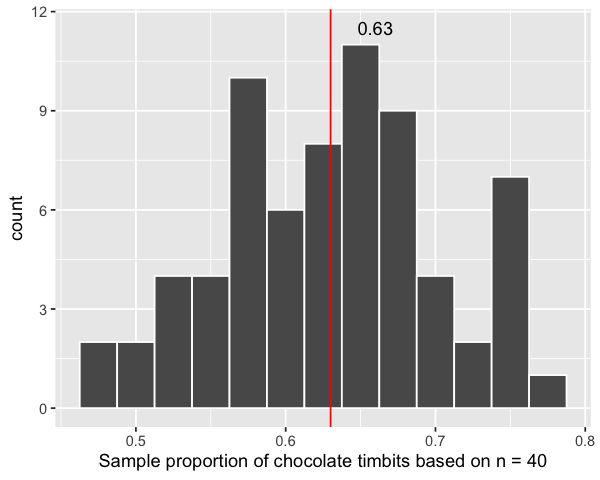

In [10]:
mean_prop_seventy_samples <- round(mean(prop_chocolate_seventy_samples$prop_chocolate), 2)
(sampling_distribution <- ggplot(prop_chocolate_seventy_samples, aes(x = prop_chocolate)) +
    geom_histogram(binwidth = 0.025, color = "white") +  
    labs(x = "Sample proportion of chocolate timbits based on n = 40") + 
    geom_vline(xintercept = mean_prop_seventy_samples, colour = "red") + 
    annotate("text", x = 0.66, y = 11.5, label = mean_prop_seventy_samples)) 

## Now it's your turn! Go!

1. Collect 70 random samples of 40 timbits & calculate a proportion of chocolate timbits (code below).

```
set.seed(1234) # so that we all have the same population
virtual_box <- tibble(timbit_id = seq(from = 1, to = 10000, by = 1),
                      color = factor(rbinom(10000, 1, 0.63), 
                                     levels = c(1, 0),
                                     labels = c("chocolate", "old fashioned")))
seventy_samples <- rep_sample_n(virtual_box, size = 40, reps = 70)
seventy_samples_grouped <- group_by(seventy_samples, replicate)
total_chocolate_seventy_samples <- summarize(seventy_samples_grouped, chocolate = sum(color == "chocolate"),
                                            prop_chocolate = sum(color == "chocolate") / 40)
mean_prop_seventy_samples <- round(mean(prop_chocolate_seventy_samples$prop_chocolate), 2)
(sampling_distribution <- ggplot(prop_chocolate_seventy_samples, aes(x = prop_chocolate)) + 
    geom_histogram(binwidth = 0.025, color = "white") +  
    labs(x = "Sample proportion of chocolate timbits based on n = 40") + 
    geom_vline(xintercept = mean_prop_seventy_samples, colour = "red") + 
    annotate("text", x = 0.65, y = 10.4, label = mean_prop_seventy_samples)) 
```

## Compare the class's sampling distribution to this one:

Note to Instructor - put plots side by side and discuss.

## Back to our marketing example

Is randomly selecting a subset of the students (taking a single sample) and then asking them if they have an iphone a good way to estimate the true proportion of all undergraduates who have iphones (population parameter we are interested in)? 

<img align="left" src="../img/sampling.002.jpeg" width="700"/>

# Wrap-up 

What did we learn today? Let's make a list here!

- 
- 
- 


# Questions that we will try to answer next?

- What happens when our population is not a gaussian/normal distribution?
- Usually we only have one sample? So what can we do? 

# Acknowledgements
- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim